C:\Users\zyliu\AppData\Local\Temp\ipykernel_34284\3481850028.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train_df = pd.read_csv("05092023-pos-philic-M-F-train.csv")


['X123.092_1.106_7698', 'X131.047_7.121_7389', 'X131.047_7.125_3361', 'X150.103_3.22_9440', 'X151.075_1.248_1411', 'X154.05_2.529_2495', 'X155.093_0.536_4856', 'X156.042_4.747_2746', 'X177.043_6.094_9230', 'X196.119_1.456_7597', 'X200.164_1.58_8848', 'X218.113_5.562_4490', 'X220.169_1.342_2619', 'X233.153_1.199_6396', 'X245.091_1.803_1856', 'X257.062_6.876_4325', 'X272.222_1.107_9100', 'X288.216_2.901_9261', 'X297.154_2.153_303', 'X324.059_4.145_4567', 'X328.102_5.723_7490', 'X335.221_1.163_9150', 'X347.221_1.342_3147', 'X351.068_6.898_7056', 'X352.165_1.629_2839', 'X366.058_5.726_5473', 'X398.326_2.057_4420', 'X489.259_1.409_8897', 'X510.355_2.184_3394', 'X663.57_1.311_4540', 'X709.072_6.328_7517', 'X728.704_4.942_5845', 'X744.552_1.366_2364', 'X746.567_1.47_9198']


C:\Users\zyliu\AppData\Local\Temp\ipykernel_34284\3481850028.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()


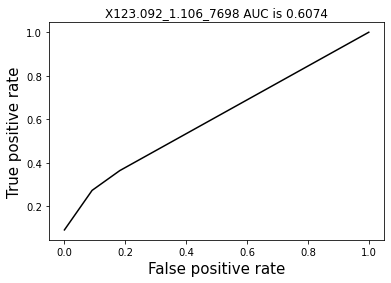

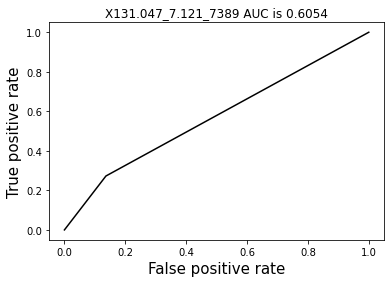

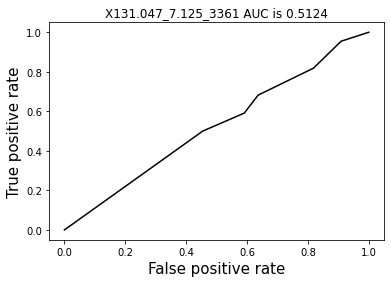

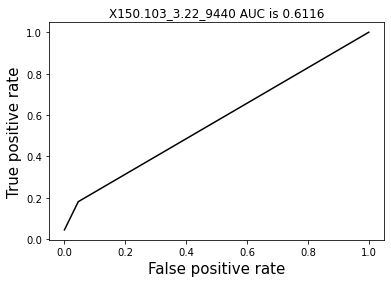

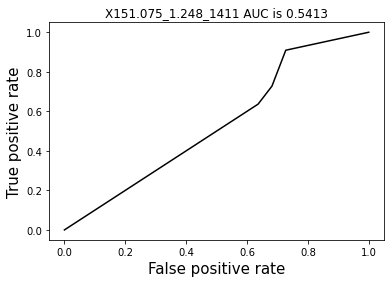

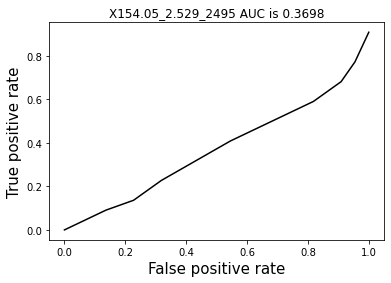

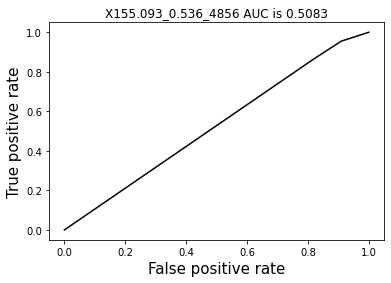

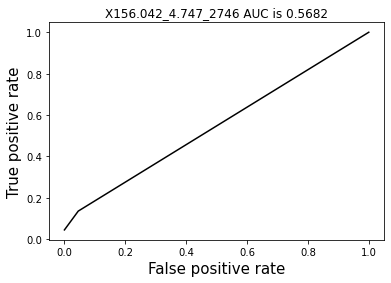

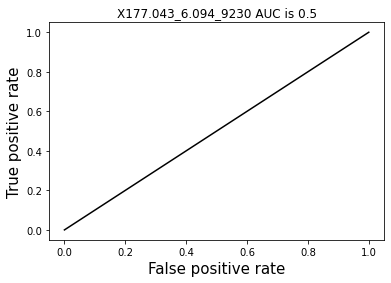

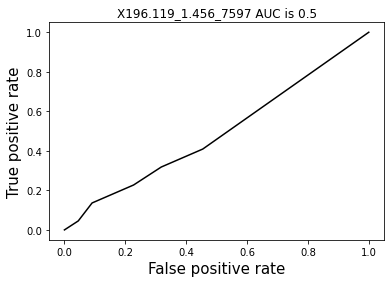

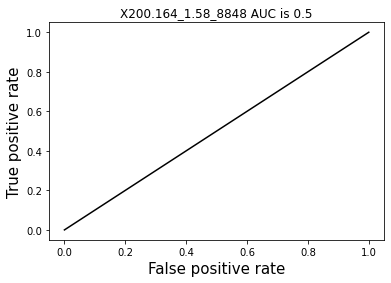

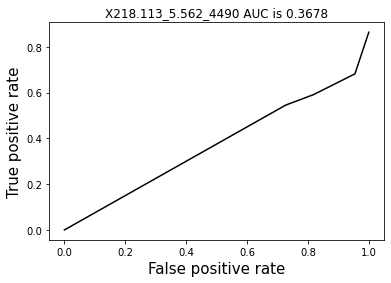

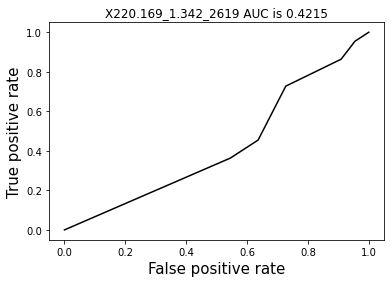

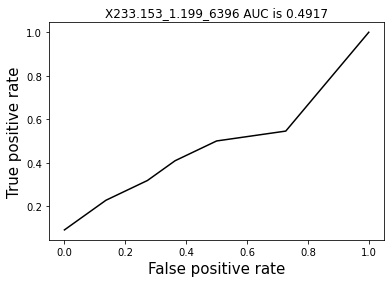

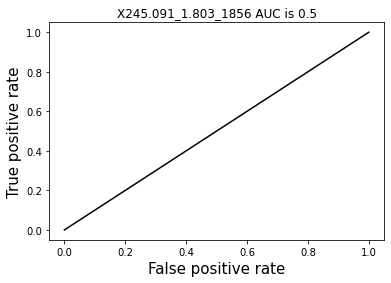

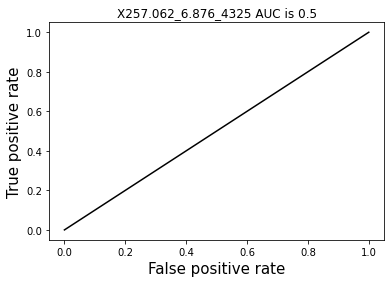

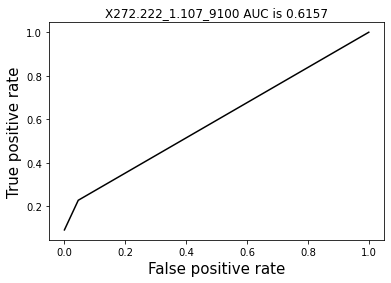

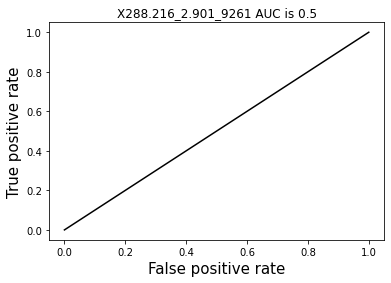

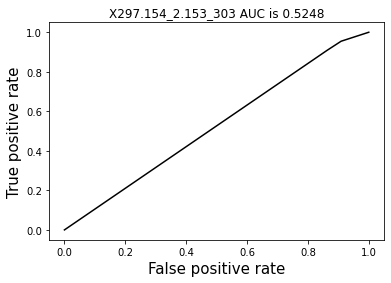

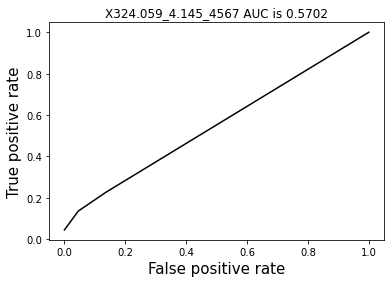

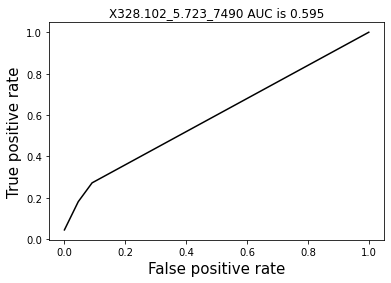

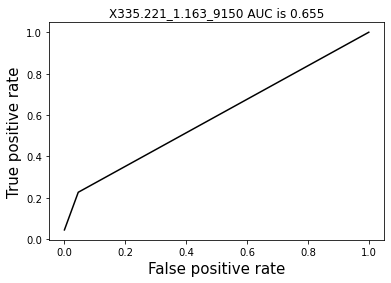

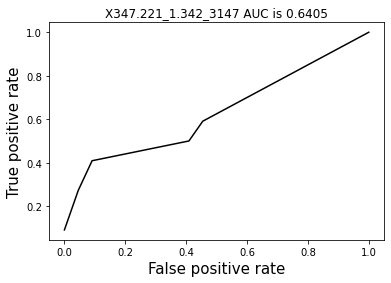

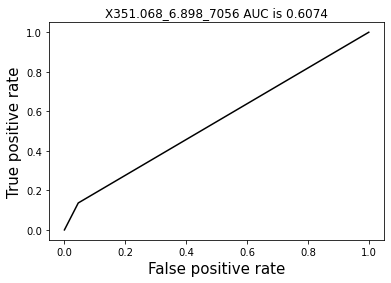

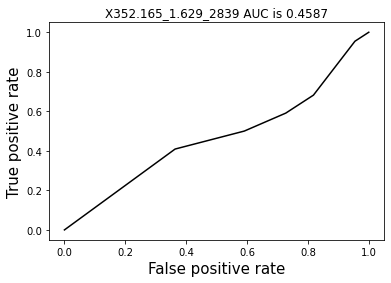

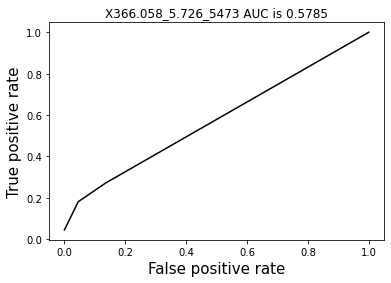

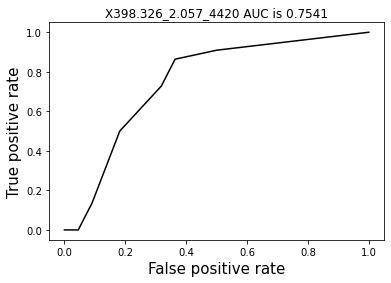

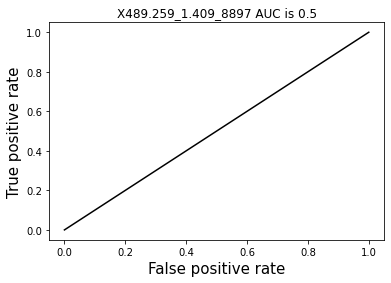

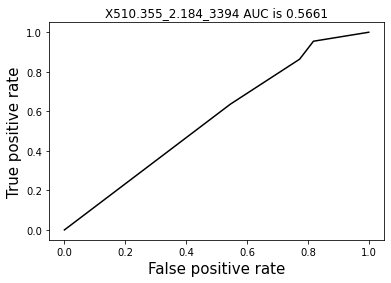

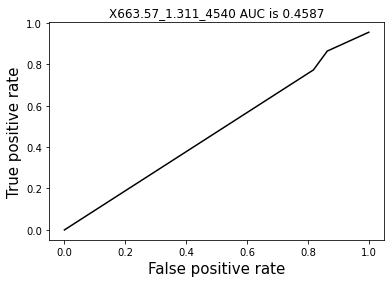

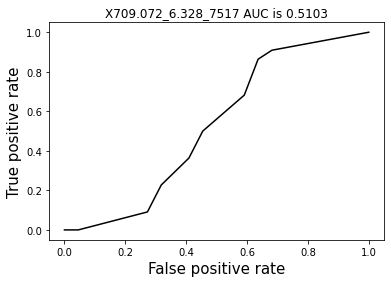

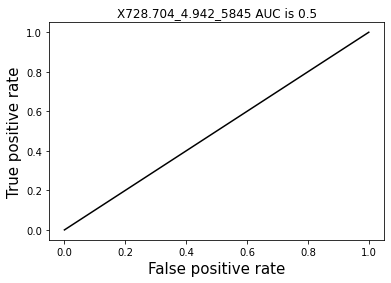

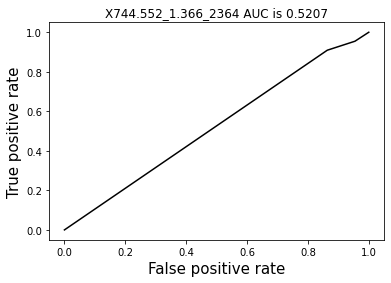

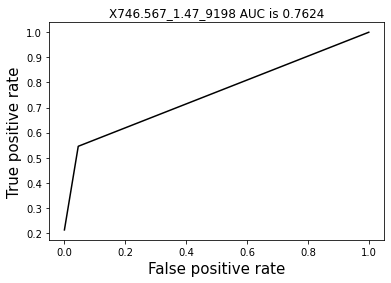

In [2]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_train_df = pd.read_csv("05092023-pos-philic-M-F-train.csv")
data_test_df = pd.read_csv("05092023-pos-philic-M-F-test.csv")
mass_list_df = pd.read_csv("pos-philic-ship1-in-ship2.csv")
mass_list = mass_list_df.filename.to_list()
print(mass_list)

binary_label = {'inf_prog':1, 'inf_non':0}
y_train = data_train_df['status'].map(binary_label)
y_test = data_test_df['status'].map(binary_label)

auc_list = []

for mass in mass_list:
    fig1, ax1 = plt.subplots()
    X_train = data_train_df[[str(mass)]]
    X_test = data_test_df[[str(mass)]]
    #plt.figure(0).clf()
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    auc_list.append(auc)
    sns.lineplot(x=fpr,y=tpr, ci=None, color="black")
    ax1.set_title(mass + ' AUC is ' + str(auc))
    ax1.set_xlabel('False positive rate', fontsize=15)
    ax1.set_ylabel('True positive rate', fontsize=15)
    plt.savefig("pos_philic_AUC_ship1_in_ship2_" + str(mass) + ".png", dpi=300, bbox_inches='tight')

auc_df = pd.DataFrame(list(zip(mass_list, auc_list)), columns=['filename', 'AUC'])
final_df = mass_list_df.merge(auc_df, how='outer', on=['filename'])
final_df.to_csv('pos-philic-ship1-in-ship2-AUC.csv', index=False)